# Volleyball Player Performance Analysis
The goal of this project is to perform an in-depth analysis of volleyball player statistics to estimate player performance based on various attributes. The dataset contains information on various volleyball players, including their country, age, and performance metrics such as attack, block, serve, set, dig

In [2]:
# importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv("VNL.csv")

In [3]:
dataset.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [4]:
#Checking for any missing values
dataset.isnull().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [5]:
dataset.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [6]:
#checking for duplicate values
dataset.duplicated().sum()

0

In [7]:
corr_matrix=dataset[dataset.select_dtypes(include=["int","float"]).columns].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


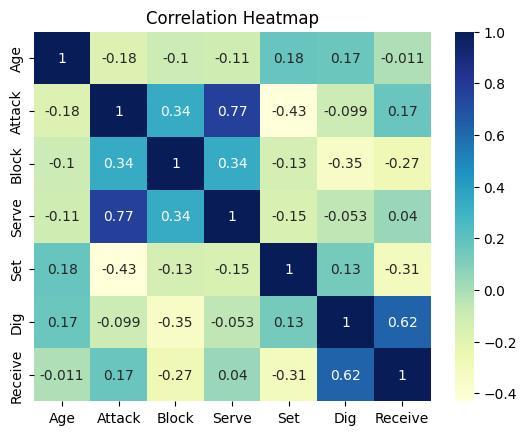

In [8]:
#compring various values
import seaborn as sns
sns.heatmap(corr_matrix,annot = True, cmap= 'YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

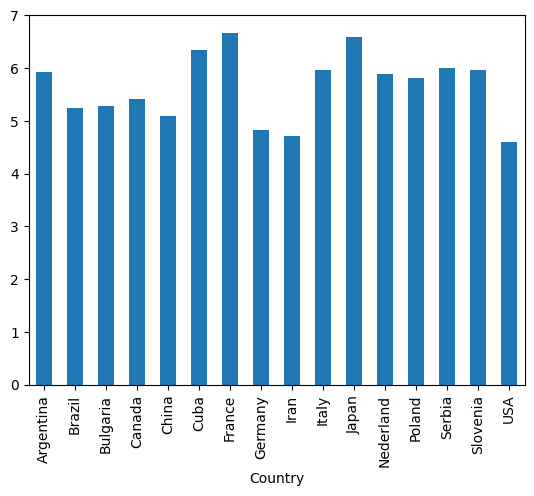

In [9]:
#ploting graph to show the Average of Attack by Each country
Avearge_attack_by_country=dataset.groupby("Country")["Attack"].mean().plot(kind="bar")
plt.show()

In [10]:
#Number of players According to different countries
dataset['Country'].value_counts()

Country
Poland       10
France       10
USA           9
Iran          9
Japan         8
Italy         8
Serbia        8
Slovenia      8
China         8
Brazil        8
Argentina     8
Germany       8
Bulgaria      8
Nederland     7
Cuba          7
Canada        7
Name: count, dtype: int64

In [11]:
#Players according to their Position
dataset['Position'].value_counts()

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

<Axes: xlabel='Position'>

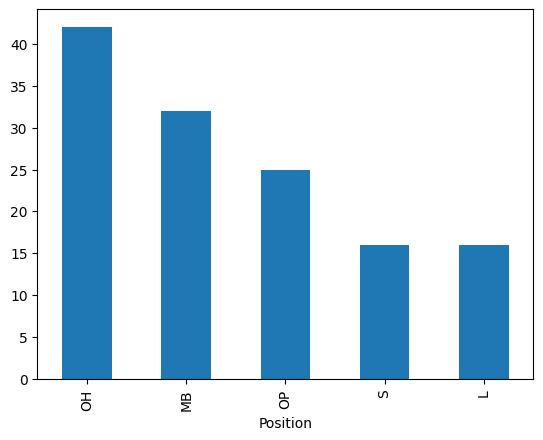

In [12]:
dataset['Position'].value_counts().plot(kind='bar')

In [13]:
#Player with maximun attack points according to the position
dataset.groupby(['Player','Position'])['Attack'].max()

Player             Position
Abdel-Aziz Nimir   OP          15.33
Anderson Matthew   OP           9.07
Andringa Robbert   L            0.00
Asparuhov Asparuh  OH           5.92
Atanasov Martin    OH           8.33
                               ...  
Yu Yuantai         OH           6.92
Zatorski Pawel     L            0.00
Zerba Nicolas      MB           3.08
Zhai Dejun         OH           4.17
Zhang Jingyin      OH          13.50
Name: Attack, Length: 131, dtype: float64

In [14]:
dataset.groupby(['Player','Position'])['Attack'].min().sort_values(ascending= True)

Player                   Position
Qu Zongshuai             L            0.00
Janusz Marcin            S            0.00
Kovacic Jani             L            0.00
Zatorski Pawel           L            0.00
Hazratpour Mohammadreza  L            0.00
                                     ...  
Luburic Drazen           OP          14.33
Herrera Jaime Jesus      OP          15.00
Faure Theo               OP          15.25
Abdel-Aziz Nimir         OP          15.33
Ichikawa Yuki            OH          15.80
Name: Attack, Length: 131, dtype: float64

<Axes: >

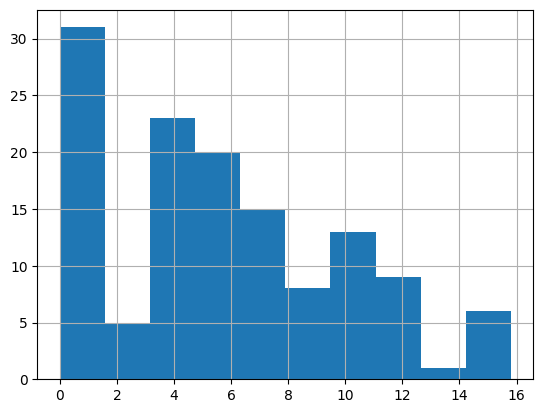

In [15]:
dataset['Attack'].hist()

<Axes: xlabel='Age', ylabel='Attack'>

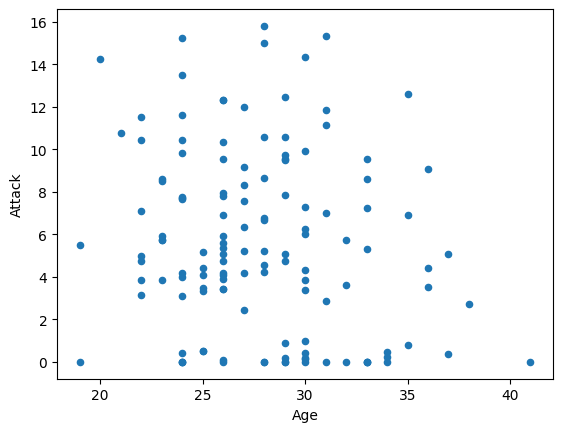

In [16]:
#ploting Scatter plot for age and attack
dataset.plot(kind='scatter', x='Age', y='Attack')

<Axes: title={'center': 'Attack'}, xlabel='Position'>

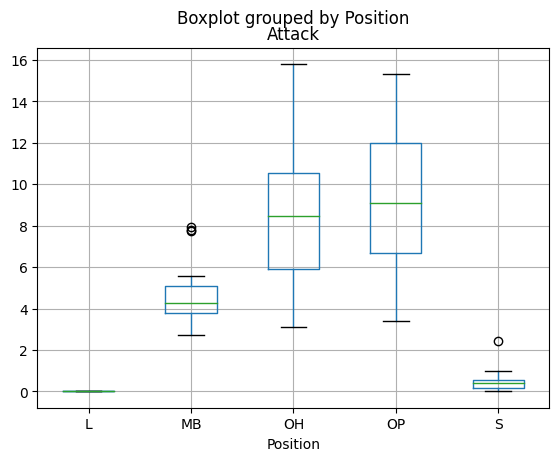

In [17]:
dataset.boxplot(column='Attack', by='Position')

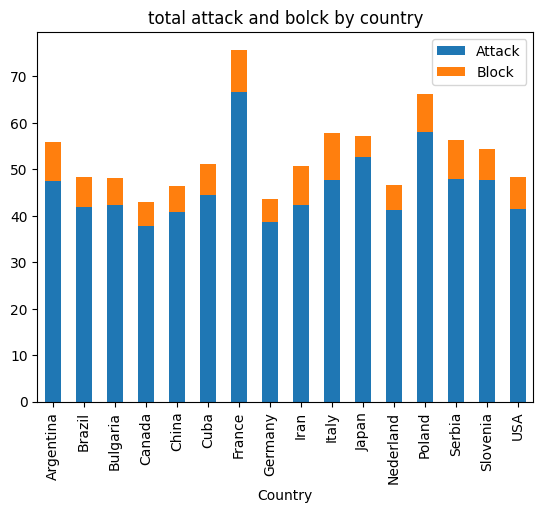

In [18]:
total_attack_bolck_by_country=dataset.groupby("Country")[['Attack','Block']].sum().plot(kind='bar',stacked=True)
plt.title("total attack and bolck by country")
plt.show()
